In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('car_price_dataset.csv')

data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
data.isna().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='count'>

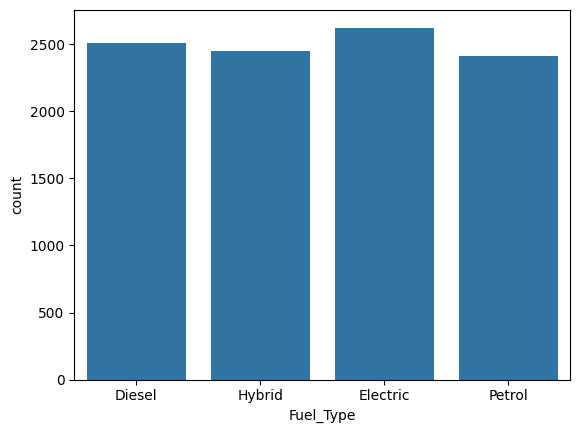

In [6]:
sns.countplot(x='Fuel_Type', data=data)

<Figure size 700x500 with 0 Axes>

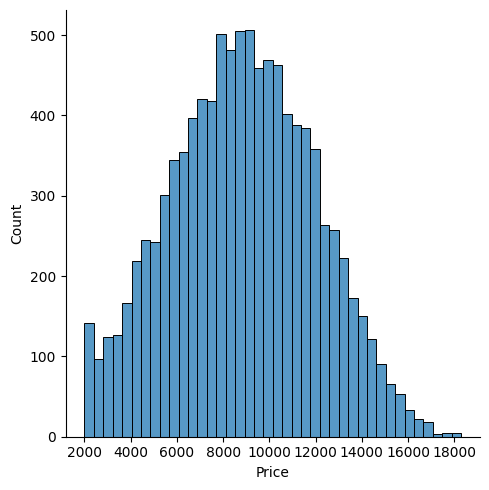

In [7]:
plt.figure(figsize=(7,5))
sns.displot(data["Price"])

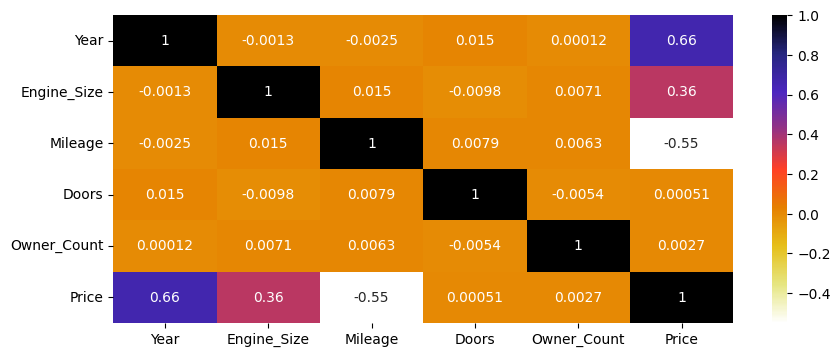

In [24]:
plt.figure(figsize = (10,4))
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r);

In [43]:
columns_to_drop = ["Doors", "Owner_Count", "Transmission"]
data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Mileage,Price
0,Kia,Rio,2020,4.2,Diesel,289944,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,5356,12092
2,Mercedes,GLA,2020,4.2,Diesel,231440,11171
3,Audi,Q5,2023,2.0,Electric,160971,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,286618,2867


In [45]:
df = pd.get_dummies(data, columns=["Fuel_Type", "Brand", "Model"], drop_first=True)
df.head()

,Year,Engine_Size,Mileage,Price,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Optima,Model_Passat,Model_Q5,Model_RAV4,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5
0,2020,4.2,289944,8501,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2012,2.0,5356,12092,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2020,4.2,231440,11171,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,2.0,160971,11780,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2003,2.6,286618,2867,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

### LR


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Model Score: {lr_model.score(X_test, y_test)}")

Mean Absolute Error: 670.9822137509235
Root Mean Squared Error: 714.6310945974844
R2 Score: 0.9459417845721304
Model Score: 0.9459417845721304
